# **_Mobile Price Prediction Project (ML)_**


## **_Loading Essential Libraries_**
*_To begin our machine learning project, we bring in a set of crucial Python libraries. These tools simplify data handling, visualization, model creation, and evaluation tasks._*

### **_1. NumPy_**
*_This library is the backbone of numerical computing in Python. It offers powerful support for multi-dimensional arrays and a wide range of mathematical operations._*

### **_2. Pandas_**
*_Ideal for data analysis, Pandas makes it easy to load, explore, and manipulate structured data using DataFrames and Series._*

### **_3. Matplotlib_**
*_A versatile plotting library that enables us to build basic charts like bar graphs, line plots, and histograms to visualize trends and distributions._*

### **_4. Seaborn_**
*_Built on top of Matplotlib, Seaborn enhances visualizations by providing more appealing and informative statistical plots._*

### **_5. Scikit-learn (sklearn)_**
 *_A comprehensive machine learning framework offering:_*

- *_Tools for data preparation (e.g., scaling, train-test split)_*

- *_A range of algorithms for classification and regression_*

- *_Model performance evaluation metrics like accuracy scores and confusion matrices_*

### **_Warnings_**
*_Helps filter out non-critical warning messages to maintain a clean and readable output during code execution._*

In [92]:
'''Numerical and data manipulation'''
import numpy as np
import pandas as pd

'''Visualization libraries'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Machine Learning tools from sklearn'''
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error, r2_score
'''For saving and loading models'''
import pickle

'''Ignore warnings for clean output'''
import warnings
warnings.filterwarnings('ignore')


## **_Data Loading & Initial Exploration_**
*_We define a class named `DataLoader` to manage the import and initial inspection of the Mobile Price Prediction dataset. It handles:_*

- *_`show_head()` → Displays the first few records*_

- *_`show_tail()` → Displays the last few records_*

- *_`random_sample()` → Shows a random subset of rows_*

- *_`summary_stats()` → Gives descriptive statistics_*

- *_`structure_info()` → Displays column data types and missing value counts_*

*_This makes it easier to explore the dataset before deeper analysis._*

In [93]:
pd.set_option('display.width', 1000)


class DataLoader:
    def __init__(self, file_path):
        """
        Initializes the DataLoader with file path
        Loads data into self.df
        """
        self.file_path = file_path
        self.df = None

    def load_data(self):
        try:
            self.df = pd.read_csv(self.file_path)
            return "Data loaded successfully."
        except Exception as e:
            print(f"Error loading data: {e}")

    def show_head(self):
        """Returns the first 5 rows of the dataset"""
        print("\nHead of the dataset:")
        return self.df.head()

    def show_tail(self):
        """Returns the last 5 rows of the dataset"""
        print("\nTail of the dataset:")
        return self.df.tail()

    def show_sample(self):
        """Returns a random sample of n rows"""
        print("\nRandom sample of the dataset:")
        return self.df.sample(5)

    def show_description(self):
        """Returns statistical description of the dataset"""
        print("\nStatistical summary:")
        return self.df.describe()

    def show_info(self):
        """Prints information about the dataset"""
        print("\nDataset information:")
        return self.df.info()


In [94]:
"""Initialize DataLoader Object with CSV File"""
loader = DataLoader("mobile price prediction.csv")
loader.load_data()
loader.show_head()


Head of the dataset:


,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [95]:
loader.show_tail()


Tail of the dataset:


,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
802,3.8,6.0,32.0,4.54,48,12.0,2800,1299
803,4.1,8.0,64.0,4.54,64,8.0,2500,1390
804,4.4,3.0,32.0,6.20,48,1.0,3800,9790
805,3.7,10.0,32.0,4.50,64,8.0,3500,799
806,3.5,6.0,32.0,4.50,64,15.0,1050,799


In [96]:
loader.show_sample()


Random sample of the dataset:


,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
11,3.8,6.0,32.0,4.50,64,8.0,1050,1299
68,3.6,1.0,32.0,4.50,48,10.0,3500,799
153,3.9,6.0,32.0,4.50,48,8.0,1750,999
751,4.2,4.0,64.0,4.50,64,8.0,3000,1099
490,3.9,6.0,64.0,4.54,48,8.0,3600,1799


In [97]:
loader.show_description()


Statistical summary:


,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
count,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000,807.000000
mean,4.112639,5.941760,64.390335,5.620660,47.821561,8.868649,3278.859975,14269.167286
std,0.367830,2.056359,53.868626,3.957409,11.155916,4.547254,937.628801,23092.739983
min,2.800000,0.000000,2.000000,2.000000,5.000000,0.000000,1020.000000,479.000000
25%,3.900000,6.000000,32.000000,4.500000,48.000000,8.000000,3000.000000,984.000000
50%,4.100000,6.000000,32.000000,4.770000,48.000000,8.000000,3000.000000,1699.000000
75%,4.400000,6.000000,64.000000,6.300000,48.000000,12.000000,3800.000000,18994.500000
max,4.800000,12.000000,256.000000,44.000000,64.000000,23.000000,6000.000000,153000.000000


In [98]:
loader.show_info()


Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


## **_Data Cleaning & Preprocessing_**
*_To prepare the data for modeling, we create a class called PreprocessingManager that handles:_*
### **_Key Tasks:_**
**_1. Missing Value Treatment_**

- *_Identifies any null values_*

- *_Handles them via removal or imputation using strategies like mean or median_*

**_2. Zero Value Checks (if applicable)**_

- *_If certain features (like battery power or RAM) have invalid zero values, we treat them accordingly_*

**_3. Renaming Columns for Simplicity_**

- *_Converts long or complex column names to shorter versions for ease of use*


`Mobile_Size` → 'mblSize'

`Primary_Cam` → 'priCam'

`Selfi_Cam` → 'selCam'

`Battery_Power` → 'power'

*_This class ensures the dataset is cleaned, consistent, and ready for model training._*

In [99]:
class DataCleaner:
    """
    Cleans and preprocesses the dataset:
    - Removes duplicates
    - Handles missing values
    - Renames long column names
    - Converts data types if needed
    """
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def check_nulls(self):
        print("\nChecking for null values:")
        print(self.df.isnull().sum())

    def replace_zeros(self):
        print("\nHandling zero values in selected columns...")
        """
        Columns where 0 is not a valid value
        """
        cols_with_invalid_zeros = ['RAM','ROM','Mobile_Size','Primary_Cam','Selfi_Cam','Battery_Power']

        for col in cols_with_invalid_zeros:
            zero_count = (self.df[col] == 0).sum()
            print(f"Column '{col}' has {zero_count} zero values.")
            """
            Replace zeros with median of the column
            """
            median_value = self.df[col].median()
            self.df[col] = self.df[col].replace(0, median_value)
            print(f"Replaced zeros in '{col}' with median value: {median_value}")

    def rename_columns(self):
        """
        Replaces complex names with simple names.
        """
        print("\nRenaming columns to simpler names...")
        renamed_columns = {
            'Mobile_Size': 'mblSize',
            'Primary_Cam': 'priCam',
            'Selfi_Cam': 'selCam',
            'Battery_Power': 'power',
        }
        self.df.rename(columns=renamed_columns, inplace=True)
        print("Renamed columns successfully.")

    def get_clean_data(self):
        return self.df


In [100]:
"""
Assuming df is already loaded
"""
loader = DataLoader("mobile price prediction.csv")
loader.load_data()
df = loader.df
cleaner = DataCleaner(df)
cleaner.check_nulls()
cleaner.replace_zeros()
cleaner.rename_columns()

"""Get the cleaned and updated dataframe
"""
cleaned_df = cleaner.get_clean_data()


Checking for null values:
Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

Handling zero values in selected columns...
Column 'RAM' has 2 zero values.
Replaced zeros in 'RAM' with median value: 6.0
Column 'ROM' has 0 zero values.
Replaced zeros in 'ROM' with median value: 32.0
Column 'Mobile_Size' has 0 zero values.
Replaced zeros in 'Mobile_Size' with median value: 4.77
Column 'Primary_Cam' has 0 zero values.
Replaced zeros in 'Primary_Cam' with median value: 48.0
Column 'Selfi_Cam' has 5 zero values.
Replaced zeros in 'Selfi_Cam' with median value: 8.0
Column 'Battery_Power' has 0 zero values.
Replaced zeros in 'Battery_Power' with median value: 3000.0

Renaming columns to simpler names...
Renamed columns successfully.


## **_Statistical Overview_**
*_We define a class named StatisticalSummary to extract deeper insights from the data. It calculates:_*

- *_Mean, Median, Mode_*

- *_Minimum, Maximum_*

- *_Count of non-null values_*

- *_Standard Deviation and Variance_*

*_These metrics help understand the scale and spread of different features—important for scaling, normalization, and model interpretation._*

In [101]:
class StatisticalSummary:
    """
    Parameters:
        df: pd.DataFrame - cleaned dataset

    Functionality:
        - Calculates basic statistics for numeric columns

    Returns:
        - Dictionary of summary stats
    """
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def show_mean(self):
        print("\nMean of each column:")
        return self.df.mean()

    def show_median(self):
        print("\nMedian of each column:")
        return self.df.median()

    def show_mode(self):
        print("\nMode of each column:")
        return self.df.mode().iloc[0]  # in case of multiple modes, show the first

    def show_max(self):
        print("\nMaximum value in each column:")
        return self.df.max()

    def show_min(self):
        print("\nMinimum value in each column:")
        return self.df.min()

    def show_std(self):
        print("\nStandard Deviation of each column:")
        return self.df.std()

    def show_variance(self):
        print("\nVariance of each column:")
        return self.df.var()

    def show_count(self):
        print("\nCount of non-null values in each column:")
        return self.df.count()

In [102]:
stats = StatisticalSummary(cleaned_df)
stats.show_mean()


Mean of each column:


Ratings        4.112639
RAM            5.956629
ROM           64.390335
mblSize        5.620660
priCam        47.821561
selCam         8.918216
power       3278.859975
Price      14269.167286
dtype: float64

In [103]:
stats.show_median()


Median of each column:


Ratings       4.10
RAM           6.00
ROM          32.00
mblSize       4.77
priCam       48.00
selCam        8.00
power      3000.00
Price      1699.00
dtype: float64

In [104]:
stats.show_mode()


Mode of each column:


Ratings       4.5
RAM           6.0
ROM          32.0
mblSize       4.5
priCam       48.0
selCam        8.0
power      3000.0
Price       649.0
Name: 0, dtype: float64

In [105]:
stats.show_max()


Maximum value in each column:


Ratings         4.8
RAM            12.0
ROM           256.0
mblSize        44.0
priCam         64.0
selCam         23.0
power        6000.0
Price      153000.0
dtype: float64

In [106]:
stats.show_min()


Minimum value in each column:


Ratings       2.8
RAM           1.0
ROM           2.0
mblSize       2.0
priCam        5.0
selCam        1.0
power      1020.0
Price       479.0
dtype: float64

In [107]:
stats.show_std()


Standard Deviation of each column:


Ratings        0.367830
RAM            2.034895
ROM           53.868626
mblSize        3.957409
priCam        11.155916
selCam         4.493530
power        937.628801
Price      23092.739983
dtype: float64

In [108]:
stats.show_variance()


Variance of each column:


Ratings    1.352991e-01
RAM        4.140797e+00
ROM        2.901829e+03
mblSize    1.566108e+01
priCam     1.244545e+02
selCam     2.019181e+01
power      8.791478e+05
Price      5.332746e+08
dtype: float64

In [109]:
stats.show_count()


Count of non-null values in each column:


Ratings    807
RAM        807
ROM        807
mblSize    807
priCam     807
selCam     807
power      807
Price      807
dtype: int64

## **_Exploratory Data Analysis (EDA)_**
*_EDA is split into two dedicated classes:_*

### **_1. FeatureAnalyzer (Univariate Analysis)_**
*_This class investigates each individual feature to understand:_*

- *_Distribution_*

- *_Unique values_*

- *_Central tendency and variability_*

- *_Frequency of categorical values (e.g., price_range)_*

In [110]:
class UnivariateAnalysis:
    """This class analyzes one variable at a time, showing distribution
    through histograms and descriptive stats."""
    
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def unique_counts(self, column):
        print(f"\nUnique values in '{column}':")
        print(self.df[column].nunique())

    def value_counts(self, column):
        print(f"\nValue counts in '{column}':")
        print(self.df[column].value_counts())

    def column_summary(self, column):
        print(f"\nSummary statistics for '{column}':")
        print(self.df[column].describe())

    def check_skewness(self, column):
        print(f"\nSkewness of '{column}': {self.df[column].skew()}")

    def check_kurtosis(self, column):
        print(f"\nKurtosis of '{column}': {self.df[column].kurt()}")

In [111]:
uni = UnivariateAnalysis(cleaned_df)
uni.unique_counts('RAM')


Unique values in 'RAM':
9


In [112]:
uni.value_counts('Ratings')


Value counts in 'Ratings':
Ratings
4.5    135
4.1     96
4.4     91
3.9     72
4.3     66
3.8     61
4.2     55
4.0     40
3.7     36
3.6     33
3.5     32
3.4     27
4.6     25
4.7     25
3.0      4
3.2      3
3.3      2
2.8      2
4.8      1
3.1      1
Name: count, dtype: int64


In [113]:
uni.column_summary('ROM')


Summary statistics for 'ROM':
count    807.000000
mean      64.390335
std       53.868626
min        2.000000
25%       32.000000
50%       32.000000
75%       64.000000
max      256.000000
Name: ROM, dtype: float64


In [114]:
uni.check_skewness('power')


Skewness of 'power': -0.24451161576939756


In [115]:
uni.check_kurtosis('Price')


Kurtosis of 'Price': 10.796041220913123


## **_2. RelationshipAnalyzer (Bivariate Analysis)_**
*_Analyzes how two features interact:_*

- *_Correlation matrix_*

- *_Group-wise summary stat_*

- *_Cross-tabulation for categorical attributes_*

- *_Pairwise scatter plots_*

*_These insights help uncover patterns and relationships critical for model design._*



In [116]:
class BivariateAnalysis:
    """This class checks relationships between numeric variables
    using scatter plots and correlation heatmap."""
    
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def correlation_matrix(self):
        print("\nCorrelation matrix:")
        print(self.df.corr())

    def covariance_matrix(self):
        print("\nCovariance matrix:")
        print(self.df.cov())

    def group_mean_by_target(self, target_col):
        print(f"\nMean of each feature grouped by '{target_col}':")
        print(self.df.groupby(target_col).mean())

    def group_count_by_target(self, target_col):
        print(f"\nCount of entries grouped by '{target_col}':")
        print(self.df.groupby(target_col).count())

    def crosstab_two_columns(self, col1, col2):
        print(f"\nCrosstab between '{col1}' and '{col2}':")
        print(pd.crosstab(self.df[col1], self.df[col2]))

In [117]:
bi = BivariateAnalysis(cleaned_df)
bi.correlation_matrix()


Correlation matrix:
          Ratings       RAM       ROM   mblSize    priCam    selCam     power     Price
Ratings  1.000000  0.111294  0.424841  0.079125 -0.108266 -0.094254  0.448317  0.570777
RAM      0.111294  1.000000  0.336086  0.006675  0.180944  0.198934  0.032715  0.297255
ROM      0.424841  0.336086  1.000000  0.106085 -0.067326 -0.051359  0.412475  0.474928
mblSize  0.079125  0.006675  0.106085  1.000000 -0.053856 -0.023962  0.131125  0.084689
priCam  -0.108266  0.180944 -0.067326 -0.053856  1.000000  0.117493 -0.059803 -0.223997
selCam  -0.094254  0.198934 -0.051359 -0.023962  0.117493  1.000000 -0.114698  0.009623
power    0.448317  0.032715  0.412475  0.131125 -0.059803 -0.114698  1.000000  0.369221
Price    0.570777  0.297255  0.474928  0.084689 -0.223997  0.009623  0.369221  1.000000


In [118]:
bi.covariance_matrix()


Covariance matrix:
             Ratings           RAM            ROM      mblSize        priCam      selCam         power         Price
Ratings     0.135299      0.083303       8.418013     0.115179     -0.444268   -0.155789  1.546193e+02  4.848295e+03
RAM         0.083303      4.140797      36.840771     0.053756      4.107636    1.819029  6.241948e+01  1.396838e+04
ROM         8.418013     36.840771    2901.828839    22.615119    -40.460039  -12.432057  2.083358e+04  5.907976e+05
mblSize     0.115179      0.053756      22.615119    15.661083     -2.377674   -0.426103  4.865509e+02  7.739505e+03
priCam     -0.444268      4.107636     -40.460039    -2.377674    124.454472    5.889855 -6.255511e+02 -5.770614e+04
selCam     -0.155789      1.819029     -12.432057    -0.426103      5.889855   20.191814 -4.832509e+02  9.985323e+02
power     154.619266     62.419478   20833.584501   486.550890   -625.551071 -483.250920  8.791478e+05  7.994526e+06
Price    4848.294781  13968.375751  590797.5

In [119]:
bi.group_mean_by_target('RAM')


Mean of each feature grouped by 'RAM':
       Ratings         ROM   mblSize     priCam    selCam        power         Price
RAM                                                                                 
1.0   3.890000   17.200000  4.644000  39.350000  7.050000  2970.000000   2517.750000
2.0   4.242857   22.857143  5.857143  27.857143  4.857143  3831.904762   9007.904762
3.0   4.200000   33.641026  5.868974  40.153846  5.051282  3701.025641  14840.487179
4.0   4.215929   57.460177  5.439142  48.513274  8.000000  3350.132743  12262.725664
5.0   3.900000   32.000000  4.540000  48.000000  8.000000  3000.000000   1024.000000
6.0   3.992199   52.385343  5.632671  49.742317  9.567376  3048.782506   6513.680851
8.0   4.349020  127.084967  5.958301  47.496732  9.562092  3738.888889  37358.686275
10.0  3.928571   26.857143  5.045714  57.142857  6.714286  3214.285714  12016.285714
12.0  4.244444   52.407407  4.768889  47.111111  9.777778  3225.185185  27846.444444


In [120]:
bi.group_count_by_target('RAM')


Count of entries grouped by 'RAM':
      Ratings  ROM  mblSize  priCam  selCam  power  Price
RAM                                                      
1.0        20   20       20      20      20     20     20
2.0        21   21       21      21      21     21     21
3.0        39   39       39      39      39     39     39
4.0       113  113      113     113     113    113    113
5.0         4    4        4       4       4      4      4
6.0       423  423      423     423     423    423    423
8.0       153  153      153     153     153    153    153
10.0        7    7        7       7       7      7      7
12.0       27   27       27      27      27     27     27


In [121]:
bi.crosstab_two_columns('RAM', 'ROM')


Crosstab between 'RAM' and 'ROM':
ROM   2.0    3.0    4.0    8.0    10.0   12.0   15.0   16.0   20.0   22.0   24.0   25.0   32.0   35.0   40.0   51.0   56.0   64.0   128.0  256.0
RAM                                                                                                                                             
1.0       0      0      1      2      0      0      0     13      1      0      0      0      3      0      0      0      0      0      0      0
2.0       0      0      0      0      0      0      0     12      0      0      0      0      9      0      0      0      0      0      0      0
3.0       0      0      0      0      0      0      0      4      0      0      0      0     31      0      0      0      0      4      0      0
4.0       1      3     24      0      0      0      0      0      1      1      2      0      5      0      3      0      0     52     21      0
5.0       0      0      0      0      0      0      0      0      0      0      0      0      4

## **_Univariate Visualizations_**
*_A specialized class, UnivariatePlotter, is used to visualize single features. Common plots include:_*

- *_Histograms – To show frequency distribution_*

- *_Boxplots – To highlight data spread and outliers_*

- *_KDE Plots – To view smooth distribution curves_*

- *_Countplots – Especially useful for target variable like price_range_*


In [122]:
class UnivariatePlots:
    """
    Parameters:
        df: pd.DataFrame - cleaned dataset

    Functionality:
        - Plots histogram for each numeric column
        - Shows descriptive statistics
    """
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def plot_histogram(self, column, figsize=(8, 4), bins=30, color='skyblue', edgecolor='black' ):
        print(f"\nHistogram for '{column}'")
        plt.figure(figsize = figsize)
        plt.hist(self.df[column], bins=bins, color = color, edgecolor=edgecolor)
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    def plot_boxplot(self, column, figsize=(6, 4),color='salmon'):
        print(f"\nBoxplot for '{column}'")
        plt.figure(figsize = figsize)
        sns.boxplot(y=self.df[column], color=color)
        plt.title(f'Boxplot of {column}')
        plt.tight_layout()
        plt.show()

    def plot_kde(self, column, figsize=(8, 4), shade=True, color='purple'):
        print(f"\nKDE Plot for '{column}'")
        plt.figure(figsize = figsize)
        sns.kdeplot(self.df[column], shade= shade, color= color)
        plt.title(f'KDE (Density) Plot of {column}')
        plt.xlabel(column)
        plt.tight_layout()
        plt.show()

    def plot_countplot(self, column, figsize=(6, 4), palette='Set2'):
        print(f"\nCountplot for '{column}'")
        plt.figure(figsize = figsize)
        sns.countplot(x=self.df[column], palette=palette)
        plt.title(f'Countplot of {column}')
        plt.tight_layout()
        plt.show()


**_This histogram shows that_**

- *_`6 GB RAM` is the most common in the dataset,_*
- *_followed by `8 GB` and `4 GB`._*
- *_Other RAM sizes appear much less frequently, indicating most phones have `6 GB RAM`._*


Histogram for 'RAM'


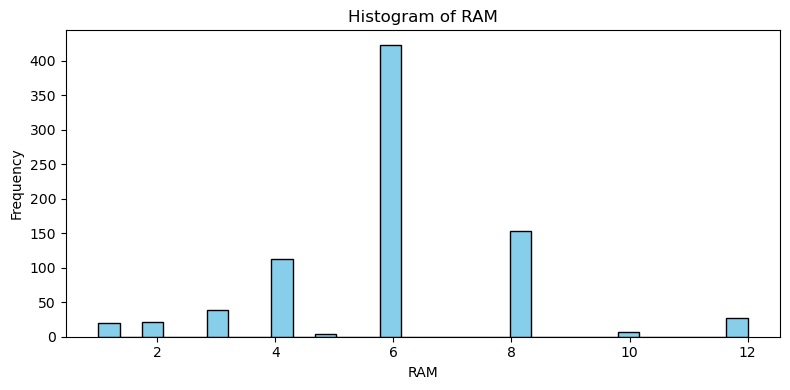

In [123]:
uni_plot = UnivariatePlots(cleaned_df)

uni_plot.plot_histogram('RAM')

**_This boxplot shows_**

- *_most phones have `30–70 GB ROM`,_* 
- *_with a median around `50 GB`._*
- *_A few phones with `128 GB` and `256 GB` are outliers._*


Boxplot for 'ROM'


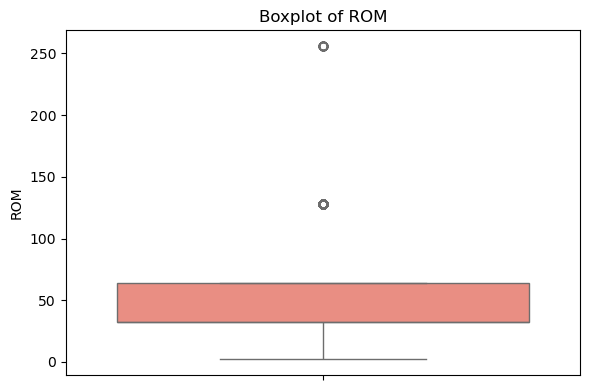

In [124]:
uni_plot.plot_boxplot('ROM')

**_The KDE plot shows_**

*_most phones are priced below `₹20,000`, with a sharp peak near the lower range and a long tail towards higher prices._*


KDE Plot for 'Price'


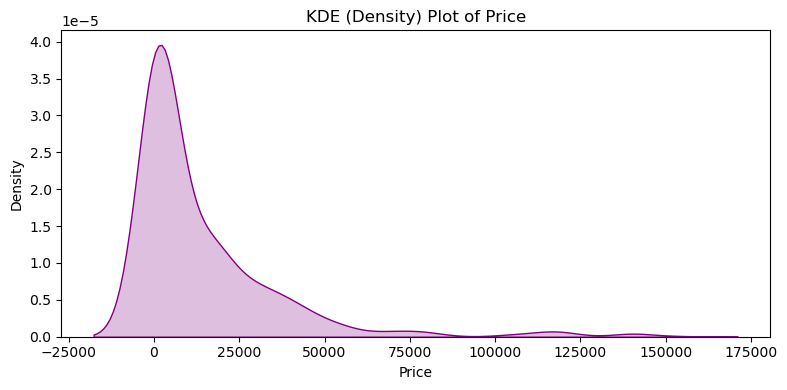

In [125]:
uni_plot.plot_kde('Price')

**_This countplot shows_**

*_the frequency of different rating values. Most ratings are concentrated between `3.8` and `4.6`, with `4.5` being the most common. Lower ratings (below `3.4`) are much less frequent._*



Countplot for 'Ratings'


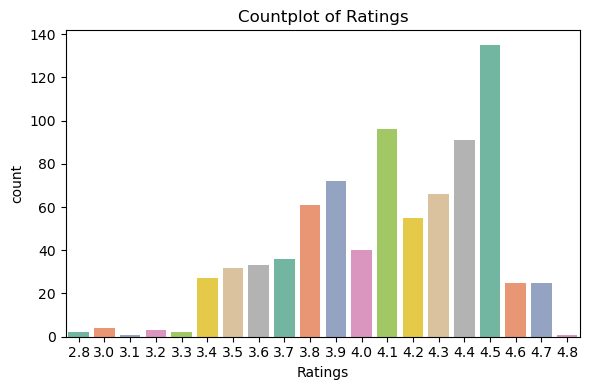

In [126]:
uni_plot.plot_countplot('Ratings')

## **_Bivariate Visualizations_**
*_With the BivariatePlotter class, we explore relationships between two variables using:_*

- *_Scatter plots – For pairs like battery power vs price_*

- *_Heatmaps – For full correlation view_*

- *_Boxplots by category – E.g., RAM across price ranges_*

- *_Pairplots – All-vs-all scatter visualizations_*

*_These help identify predictive relationships between features._*

In [127]:
class BivariatePlots:
    """
    Parameters:
        df: pd.DataFrame - cleaned dataset

    Functionality:
        - Plots correlation heatmap
        - Plots scatterplots between key pairs
    """
    def __init__(self, dataframe):
        self.df = dataframe.copy()

    def scatter_plot(self, col1, col2, figsize=(8, 5), palette='coolwarm'):
        print(f"\nScatter Plot: '{col1}' vs '{col2}'")
        plt.figure(figsize=figsize)
        sns.scatterplot(x=self.df[col1], y=self.df[col2], hue=self.df['RAM'], palette=palette)
        plt.title(f'Scatter Plot: {col1} vs {col2}')
        plt.tight_layout()
        plt.show()

    def correlation_heatmap(self, figsize=(10, 8), annot=True, cmap='coolwarm', fmt=".2f", square=True):
        print("\nCorrelation Heatmap")
        plt.figure(figsize=figsize)
        sns.heatmap(self.df.corr(), annot=annot, cmap=cmap, fmt=fmt, square=square)
        plt.title("Correlation Heatmap")
        plt.tight_layout()
        plt.show()

    def boxplot_by_category(self, numerical_col, category_col='RAM',figsize=(7, 5), palette='pastel'):
        print(f"\nBoxplot: '{numerical_col}' grouped by '{category_col}'")
        plt.figure(figsize=figsize)
        sns.boxplot(x=self.df[category_col], y=self.df[numerical_col], palette=palette)
        plt.title(f'Boxplot of {numerical_col} by {category_col}')
        plt.tight_layout()
        plt.show()

    def pairplot(self, columns=None , hue='RAM', palette='husl'):
        print(f"\nPairplot of selected features")
        if columns:
            sns.pairplot(self.df[columns], hue=hue, palette=palette)
        else:
            sns.pairplot(self.df, hue=hue, palette=palette)
        plt.tight_layout()
        plt.show()

**_This scatter plot shows that_**

*_phones with higher RAM (especially `8GB and 12GB`) tend to have higher prices._* 

*_Lower RAM options (`2GB–4GB`) are mostly found in lower price ranges._*



Scatter Plot: 'Price' vs 'RAM'


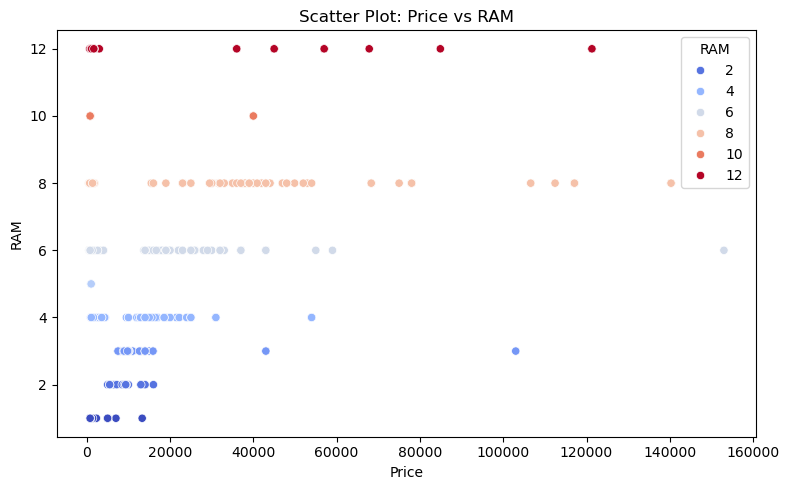

In [128]:
bi_plot = BivariatePlots(cleaned_df)

bi_plot.scatter_plot('Price', 'RAM')

**_This heatmap shows that_**

- *_price has the strongest positive correlation with ratings (`0.57`), ROM (`0.47`), and power (`0.37`)._*
- *_Primary camera has a weak negative correlation with price (`–0.22`)._* 
- *_Most other features have low or weak correlations._*



Correlation Heatmap


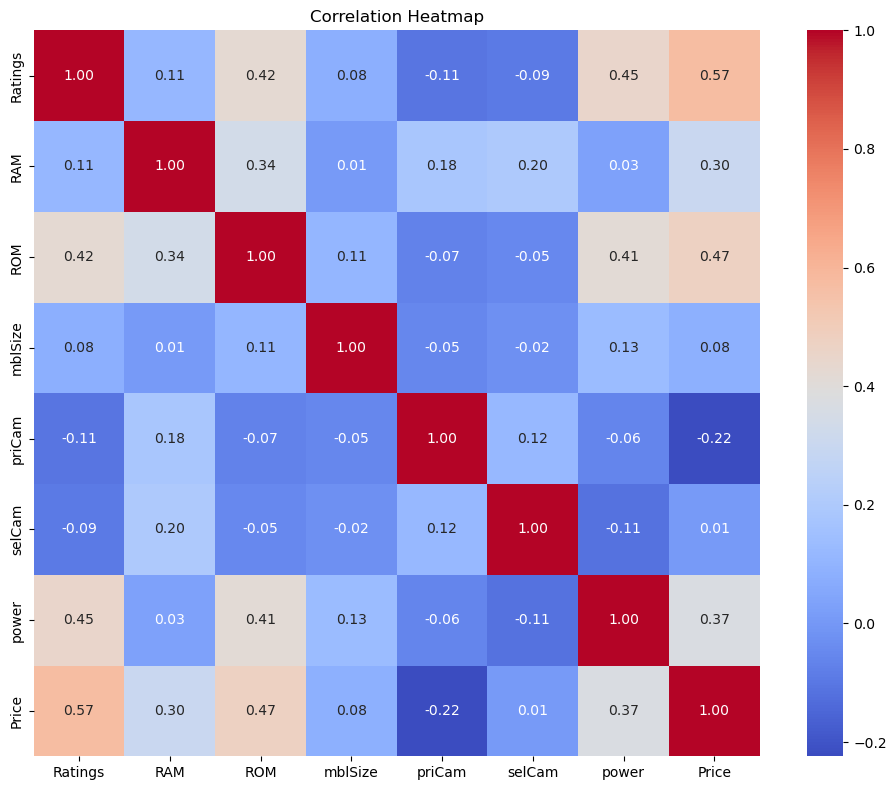

In [129]:
bi_plot.correlation_heatmap()

**_This boxplot shows_** 

- *_the distribution of product ratings across different RAM sizes._*

- *_Each box represents the interquartile range (IQR), with the line inside indicating the median rating._* 

- *_Overall, ratings remain relatively high across all RAM sizes, with slight variations and some outliers present, especially for lower RAM values._*



Boxplot: 'Ratings' grouped by 'RAM'


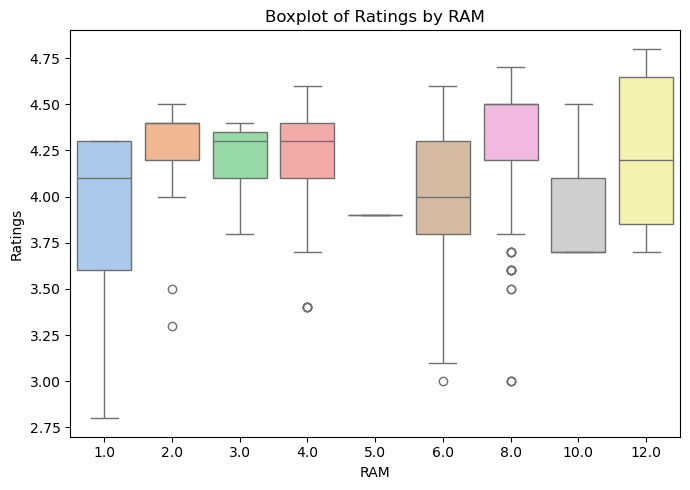

In [130]:
bi_plot.boxplot_by_category('Ratings')

## **_Machine Learning Workflow_**
*_We wrap the model training process in a class named ModelTrainer. It consists of:_*

### **_Train-Test Splitting_**

- *_Divides the dataset into training and testing sets_*

### **_Model Training_**

- *_Uses algorithms like RandomForestClassifier to predict price_range_*

### **_Model Evaluation_**

*_Uses performance metrics like:_*

- *_Accuracy_*

- *_Confusion Matrix_*

- *_Classification Report_*

### **_Making Predictions_**

- *_Applies the trained model to predict price categories of mobile phones_*

In [133]:
# 1. Data Splitting
class DataSplitter:
    """
    Parameters:
        df: pd.DataFrame - cleaned dataset
        target_column: str - label/target column

    Functionality:
        - Splits dataset into train/test sets

    Returns:
        - X_train, X_test, y_train, y_test
    """
    def __init__(self, dataframe, target_column='Price', test_size=0.2, random_state=42):
        self.df = dataframe
        self.target = target_column
        self.test_size = test_size
        self.random_state = random_state

    def split(self):
        X = self.df.drop(columns=[self.target])
        y = self.df[self.target]
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=self.test_size, random_state=self.random_state
        )
        return X_train, X_test, y_train, y_test


# 2. Model Training
class ModelTrainer:
    def __init__(self):
        self.model = LogisticRegression(max_iter=1000)

    def train_model(self, X_train, y_train):
        self.model.fit(X_train, y_train)
        return self.model


# 3. Model Evaluation
class ModelEvaluator:
    def __init__(self, model):
        self.model = model

    def evaluate(self, X_test, y_test):
        y_pred = self.model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        cm = confusion_matrix(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        return {
            "accuracy": acc,
            "confusion_matrix": cm,
            "classification_report": report
        }


# 4. Model Prediction
class ModelPredictor:
    def __init__(self, model):
        self.model = model

    def predict(self, new_data_df):
        return self.model.predict(new_data_df)


class InputHandler:
    """
    Takes user dictionary input and formats it
    to match model’s expected feature columns.
    """
    def __init__(self, feature_columns):
        self.feature_columns = feature_columns

    def prepare_input(self, user_input_dict):
        cleaned_input = {key: val for key, val in user_input_dict.items() if key in self.feature_columns}
        input_df = pd.DataFrame([cleaned_input])
        input_df = input_df.reindex(columns=self.feature_columns).fillna(0)  # Fill missing values with 0
        return input_df


In [ ]:
# Step 0: Cleaned dataset and target setup
target_column = 'Price'
splitter = DataSplitter(cleaned_df, target_column=target_column)
X_train, X_test, y_train, y_test = splitter.split()

print("Model expects columns:", X_train.columns.tolist())

# Step 1: Train
trainer = ModelTrainer()
model = trainer.train_model(X_train, y_train)

# Step 2: Evaluate
evaluator = ModelEvaluator(model)
results = evaluator.evaluate(X_test, y_test)
print("Accuracy:", results["accuracy"])
print("Confusion Matrix:\n", results["confusion_matrix"])
print("Classification Report:\n", results["classification_report"])

# Step 3: Predict sample
predictor = ModelPredictor(model)
sample = X_test.sample(1)
print("Prediction on sample row:", predictor.predict(sample))

# Step 4: User input to predict Price
user_input = {
    'Ratings': 4.5,
    'ROM': 128.0,
    'mblSize': 6.5,
    'priCam': 64,
    'selCam': 32,
    'power': 4500
}

input_handler = InputHandler(X_train.columns)
formatted_input_df = input_handler.prepare_input(user_input)

# Step 5: Predict
user_prediction = model.predict(formatted_input_df)
print("Predicted Price Category:", user_prediction[0])

Model expects columns: ['Ratings', 'RAM', 'ROM', 'mblSize', 'priCam', 'selCam', 'power']
Accuracy: 0.06172839506172839
Confusion Matrix:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Classification Report:
               precision    recall  f1-score   support

         599       0.00      0.00      0.00         3
         629       0.00      0.00      0.00         2
         639       0.00      0.00      0.00         1
         649       0.00      0.00      0.00         5
         699       0.00      0.00      0.00         3
         749       0.00      0.00      0.00         1
         798       0.00      0.00      0.00         0
         799       0.00      0.00      0.00         4
         849       0.00      0.00      0.00         1
         869       0.00      0.00      0.00         1
         899       0.00      0.00      0.00         1
         900       0.00      0.00      0.00         1
         927   

## **_Saving and Loading Trained Model with Pickle_**
*_We use the `Pickle` library to save the trained Ml Model into `.pkl` file. This allows us to reuse the model without retraining._*

### **_Why we use Pickle?_**
- *_Avoids retraining_*
- *_Good for development_*
- *_Makes model portable_*
  
*_The `PickleHandler` class has method to save and load the model_*

In [ ]:
class PickleHandler:
    """
    A class to save and load machine learning models using pickle.
    
    Parameters:
    -----------
    model : object, optional
        Trained model object (e.g., LinearRegression, DecisionTree, etc.)
    
    Methods:
    --------
    save_model(filename):
        Saves the model to a specified .pkl file.
    
    load_model(filename):
        Loads and returns the model from a specified .pkl file.
    """
    def __init__(self, model=None):
        self.model = model

    def save(self, filename='mobile_price_model.pkl'):
        with open(filename, 'wb') as f:
            pickle.dump(self.model, f)
        return f"Model saved as {filename}"

    def load(self, filename='mobile_price_model.pkl'):
        with open(filename, 'rb') as f:
            self.model = pickle.load(f)
        return self.model

In [ ]:
saver = PickleHandler(model)
print(saver.save())

# Optional: To load later
loaded_model = saver.load()

Model saved as mobile_price_model.pkl
